In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F


# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Dataset preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Model, loss, and optimizer
model = SimpleCNN().to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Specify the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print('Finished Training')

# Save the model
torch.save(model.state_dict(), 'simple_cnn_cifar10.pth')


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.4926791916722837
Epoch 2, Loss: 1.1397014200077642
Epoch 3, Loss: 0.9860629308254213
Epoch 4, Loss: 0.8857079396010055
Epoch 5, Loss: 0.8091564922381544
Epoch 6, Loss: 0.7490559822077032
Epoch 7, Loss: 0.7003344874400312
Epoch 8, Loss: 0.6530869355058426
Epoch 9, Loss: 0.6199062189177784
Epoch 10, Loss: 0.5801274721198679
Finished Training


In [ ]:
import matplotlib.pyplot as plt

train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(running_loss / len(testloader))
    test_accuracies.append(100 * correct / total)
    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Test Accuracy: {test_accuracies[-1]}%")


Epoch 1, Train Loss: 0.5508528598548507, Test Loss: 0.7175700434833575, Test Accuracy: 75.43%
Epoch 2, Train Loss: 0.522679528883656, Test Loss: 0.7150379024493466, Test Accuracy: 75.55%
Epoch 3, Train Loss: 0.4966054304557688, Test Loss: 0.7049748867180696, Test Accuracy: 76.07%
Epoch 4, Train Loss: 0.4774439460824213, Test Loss: 0.6962677304911765, Test Accuracy: 76.8%
Epoch 5, Train Loss: 0.45738910071913846, Test Loss: 0.7004770617576161, Test Accuracy: 76.58%
Epoch 6, Train Loss: 0.4370187025355256, Test Loss: 0.7107586760050172, Test Accuracy: 75.96%
Epoch 7, Train Loss: 0.41958428300021555, Test Loss: 0.7498984519083789, Test Accuracy: 75.82%
Epoch 8, Train Loss: 0.40637657589391063, Test Loss: 0.7402091476188344, Test Accuracy: 75.78%
Epoch 9, Train Loss: 0.3960627150886199, Test Loss: 0.7349933513030884, Test Accuracy: 76.07%
Epoch 10, Train Loss: 0.38156404517248005, Test Loss: 0.738236742224663, Test Accuracy: 76.55%


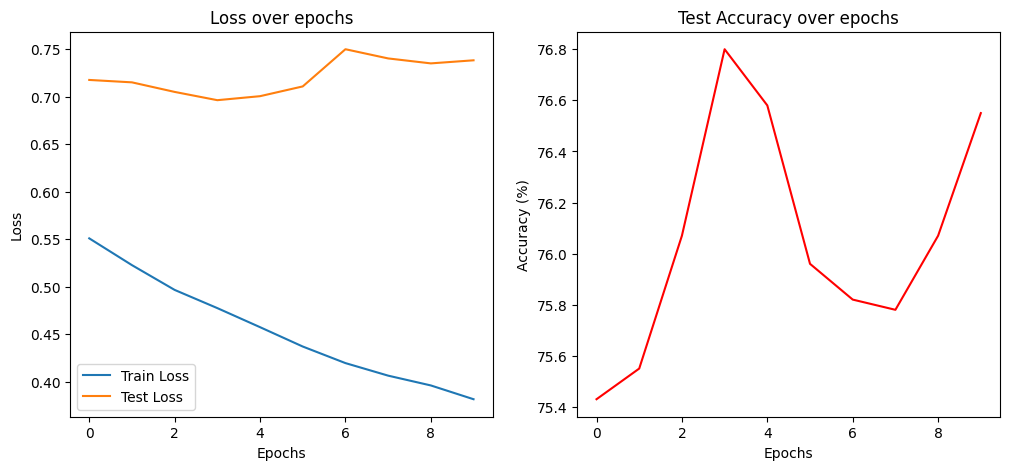

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, color='red')
plt.title('Test Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.show()
